In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/winequality-red.csv", index_col=None)

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
np.sort(df["quality"].unique())

array([3, 4, 5, 6, 7, 8])

In [5]:
# Mapping dictionary that maps the values in quality from 0 to 5 instead of 3 to 8
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [6]:
# Apply the mapping to the column quality
df["quality"] = df.quality.map(quality_mapping)
np.sort(df["quality"].unique())

array([0, 1, 2, 3, 4, 5])

In [7]:
df.shape

(1599, 12)

In [10]:
# Here, we split the data into train_df and test_df
# sample with frac=1 --> shuffle the data and return the frac * no.of samples. Since frac = 1, it would return all the samples after shuffling.
# Since the samples are shuffled, we reset the index and then drop the index column 

df_train = df.head(1000).sample(frac=1).reset_index(drop=True)
df_test = df.tail(599).sample(frac=1).reset_index(drop=True)

In [11]:
df_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.99860,3.04,1.05,9.4,2
1,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,2
2,9.1,0.66,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,2


### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [21]:
dt_clf = DecisionTreeClassifier()

In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [23]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

target_col = df_train.quality

In [26]:
dt_clf.fit(df_train[feature_cols], target_col)

In [27]:
# Calculating the performance of the Decision Tree Classifier in the Train Set
train_preds = dt_clf.predict(df_train[feature_cols])
train_metrics = metrics.accuracy_score(target_col, train_preds)

# Calculating the performance in Test Set
test_preds = dt_clf.predict(df_test[feature_cols])
test_metrics = metrics.accuracy_score(df_test.quality, test_preds)

print(train_metrics, test_metrics)


1.0 0.44908180300500833


If we see the above train and test result, we can see that we have a train accuracy of 100% whereas we have a test accuracy of 46%. This is a clear sign of overfiting the model on train data.

Now, to visualize this overfitting, lets plot a graph that shows accuracy vs max_depth.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)

%matplotlib inline

In [32]:
train_accs = []
test_accs = []

In [36]:
max_depth = 25
for depth in range(1, max_depth):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[feature_cols], df_train.quality)
    
    train_preds = clf.predict(df_train[feature_cols])
    test_preds = clf.predict(df_test[feature_cols])
    
    train_acc = metrics.accuracy_score(df_train.quality, train_preds)
    test_acc = metrics.accuracy_score(df_test.quality, test_preds)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

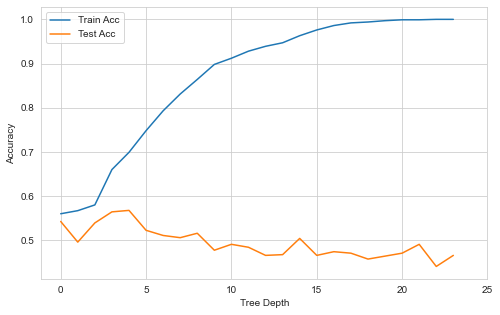

In [58]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.plot(train_accs, label="Train Acc")
plt.plot(test_accs, label="Test Acc")
plt.legend()
plt.xticks(range(0, 26, 5))
plt.xlabel("Tree Depth", size=10)
plt.ylabel("Accuracy", size=10)
plt.show()